In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns 

In [4]:
import pandas_profiling

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [9]:
f= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
f.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Drought Code (DC), Duff Moisture Code (DMC) and Fine Fuel Moisture Code (FFMC) Relative humidity (RH) Initial spread index(ISI)

In [10]:
f.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [11]:
f.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [12]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [13]:
f.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [14]:
f.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [15]:
f.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [16]:
pd.get_dummies(f['month']).head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
pd.get_dummies(f['day']).head()

,fri,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0


In [18]:
f.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [19]:
f.isnull().describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517,517,517,517,517,517,517,517,517,517,517,517,517
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,517,517,517,517,517,517,517,517,517,517,517,517,517


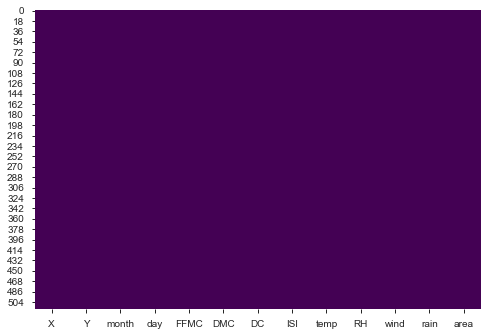

In [20]:
sns.heatmap(f.isnull(),cbar=False,cmap='viridis')

In [22]:
pandas_profiling.ProfileReport(f)

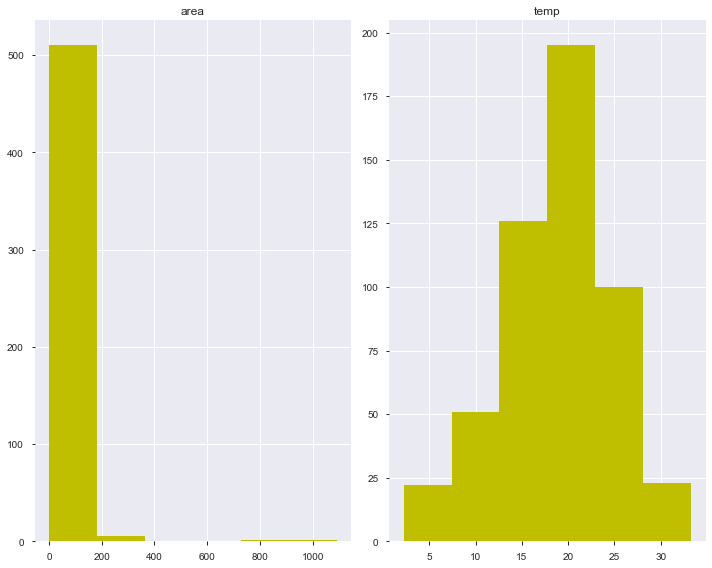

In [25]:
f[['temp','area','month']].hist(figsize=(10,8),bins=6,color='y')
plt.tight_layout()
plt.show()

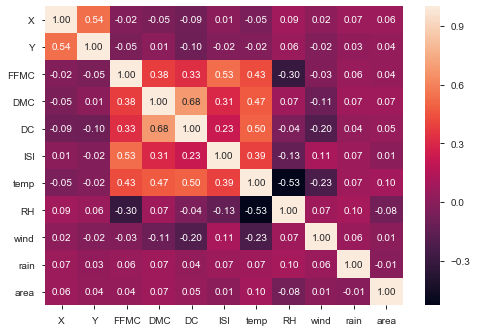

In [27]:
sns.heatmap(f.corr(),annot=True,fmt = '.2f')

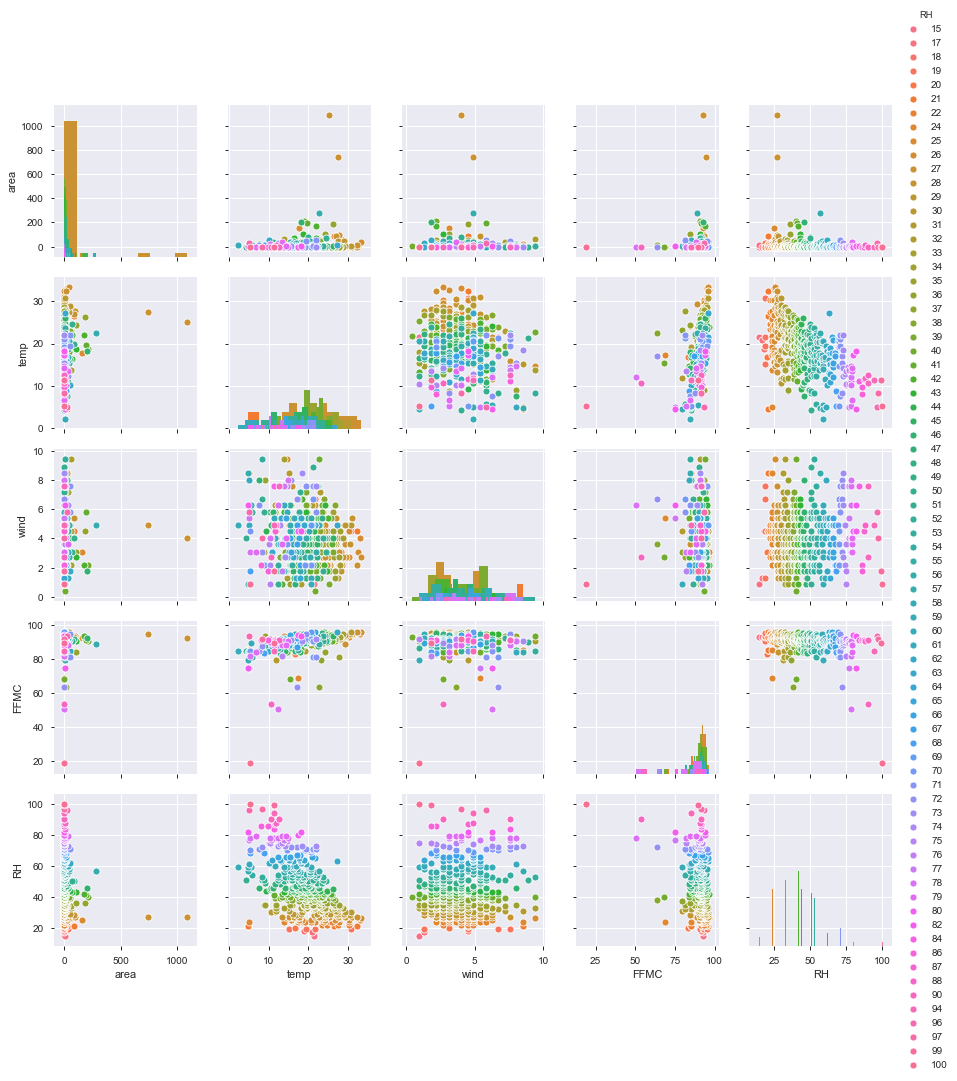

In [38]:
sns.pairplot(f[['area','temp','wind','FFMC','RH']],hue='RH',diag_kind='hist')

In [30]:
f.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [23]:
np.zeros_like(f['area'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
np.ones_like(f['area'])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [26]:
f['area']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [27]:
x= f[['RH']]

In [28]:
y= f['area']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [30]:
x_train.shape

(387, 1)

In [31]:
y_test.shape

(130,)

In [32]:
model = LinearRegression()

In [101]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model.coef_

array([-0.2179891])

In [35]:
model.intercept_

21.199371005525713

In [54]:
a = model.predict(x_test)

In [64]:
y_test

487     16.40
256      8.02
84       0.00
232    103.39
18       0.00
        ...  
510      0.43
68       0.00
145      0.90
99       0.00
88       0.00
Name: area, Length: 130, dtype: float64

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
results = pd.DataFrame({'actual':y_test,
                       'prediction':a})

In [96]:
results.head()

,actual,prediction
487,16.40,13.787742
256,8.02,12.261818
84,0.00,11.389862
232,103.39,11.825840
18,0.00,13.569753


In [104]:
from sklearn import metrics
print("mean square error",metrics.mean_absolute_error(a,y_test))
print("mean absolute error",metrics.mean_squared_error(a,y_test))
print("r_square error",metrics.r2_score(x_train,y_train))
#print("cross",cross_val_score(a,y_test))

mean square error 21.501809025760963
mean absolute error 5037.575833426474
r_square error -17.58691804233486


In [79]:
b = f[['temp']]

In [105]:
c = f['area']

In [149]:
b_train,b_test,c_train,c_test=train_test_split(b,c,test_size=0.4)

In [150]:
model1 = LinearRegression()

In [151]:
model1.fit(b,c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
model1.coef_

array([1.07262762])

In [153]:
model1.intercept_

-7.413751564770022

In [154]:
w = model1.predict(b_test)

In [155]:
result = pd.DataFrame({'actual is ':c_test,
                      'predict values':w})
result.head()

,actual is,predict values
415,746.28,22.083508
400,8.16,22.619822
27,0.00,13.395224
375,39.35,9.104714
323,2.18,6.423145


In [156]:
model1.score(b_train,c_train)

0.005863937319519952